In [1]:
import os #Intraction local system directories
import pandas as pd #Data processing
import numpy as np #Linear algebra

os.chdir("C:/Users/tanis/Desktop/Data_Science/Edwisor/Project1_BikeRenting/BikeRentingTanishka")
data = pd.read_csv('day.csv', sep = ',')
os.getcwd()

'C:\\Users\\tanis\\Desktop\\Data_Science\\Edwisor\\Project1_BikeRenting\\BikeRentingTanishka'

In [2]:
data.shape

(731, 16)

In [3]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,02-01-2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,03-01-2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,04-01-2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,05-01-2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
data.dtypes #checking datatypes 

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [5]:
#changing data types 
for i in ['season' , 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']:
    data[i] = data[i].astype('category')
data.dtypes

instant          int64
dteday          object
season        category
yr            category
mnth          category
holiday       category
weekday       category
workingday    category
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
dtype: object

In [6]:
#understanding the data
data.shape #contains (731, 16)
data.describe() #data  consist of Integers , Float  and Object(categorical) variables

,instant,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


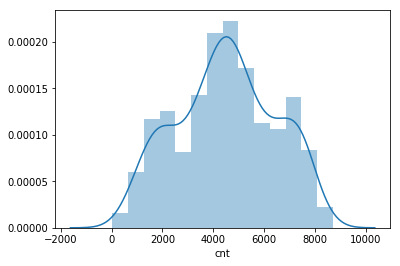

In [7]:
##################################################### Univariate Analysis##########################################
import matplotlib.pyplot as plt # some plotting!
import seaborn as sns # so For Plots!
%matplotlib inline 
# Target variable  analysis
#Check whether target variable is normal or not
sns.distplot(data['cnt']);

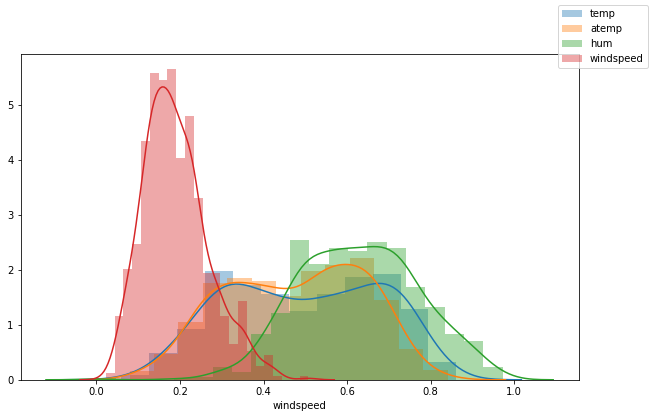

In [8]:
#Data Distribution for independent numeric variables 
fig = plt.figure(figsize=(10,6))
#Check whether  variable 'temp'is normal or not
sns.distplot(data['temp']);
#Check whether  variable 'atemp'is normal or not
sns.distplot(data['atemp']);
#Check whether  variable 'hum'is normal or not
sns.distplot(data['hum']);
#Check whether  variable 'windspeed'is normal or not
sns.distplot(data['windspeed']);
fig.legend(labels=['temp','atemp','hum','windspeed'],)
plt.show()

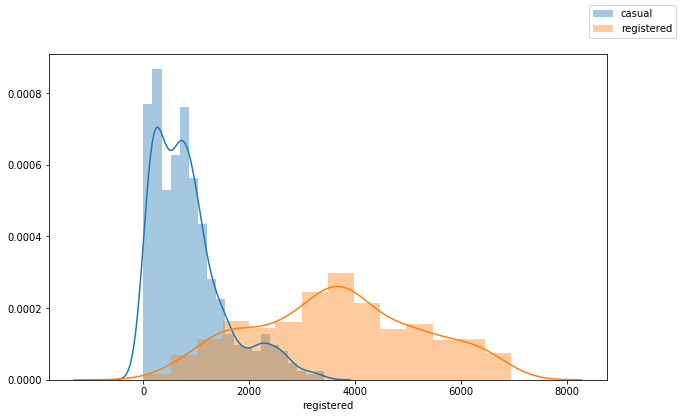

In [9]:
#Check whether  variable 'casual'is normal or not
fig = plt.figure(figsize=(10,6))
sns.distplot(data['casual']);
#Check whether  variable 'registered'is normal or not
sns.distplot(data['registered']);
fig.legend(labels=['casual','registered'])
plt.show()

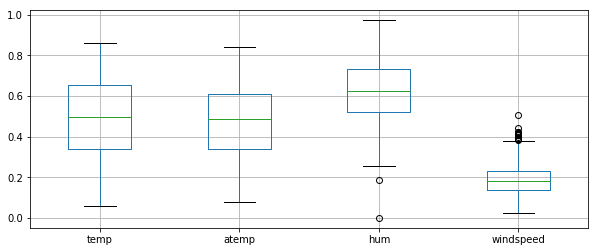

In [10]:
fig_size = plt.rcParams['figure.figsize']
fig_size[0] = 10
fig_size[1] = 4
plt.rcParams['figure.figsize'] = fig_size
data.boxplot(column=['temp','atemp','hum','windspeed'])
# it is clearly showing that there are outliers present in  'windspeed,hum' varible

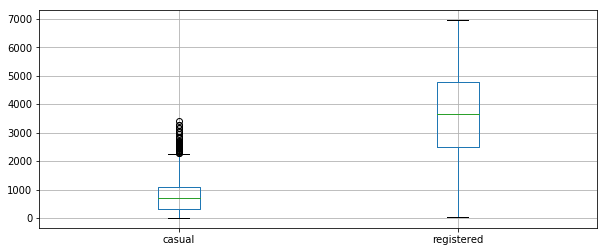

In [11]:
fig_size = plt.rcParams['figure.figsize']
fig_size[0] = 10
fig_size[1] = 4
plt.rcParams['figure.figsize'] = fig_size
data.boxplot(column=['casual','registered'])
# it is clearly showing that there are outliers present in  'casual' varible

In [12]:
print("Skewness: %f" % data['cnt'].skew())
print("Kurtosis: %f" % data['cnt'].kurt())
#Here Skewness is very less so target variable  is normal distribution

Skewness: -0.047353
Kurtosis: -0.811922


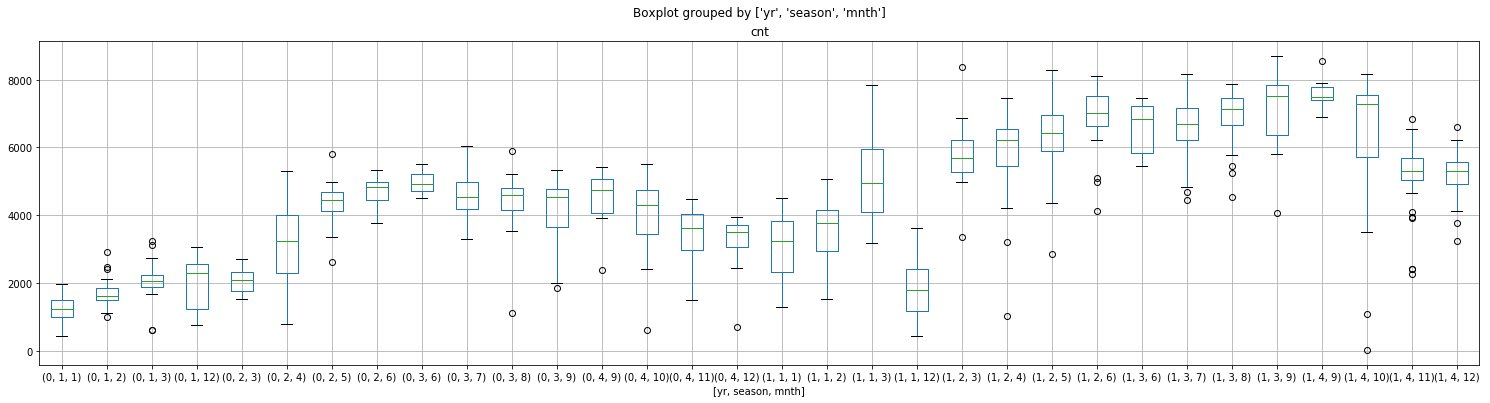

In [13]:
fig_size = plt.rcParams['figure.figsize']
fig_size[0] = 25
fig_size[1] = 6
plt.rcParams['figure.figsize'] = fig_size
data.boxplot(column='cnt', by=['yr','season','mnth'])
#over the years count of rental bikes have increased

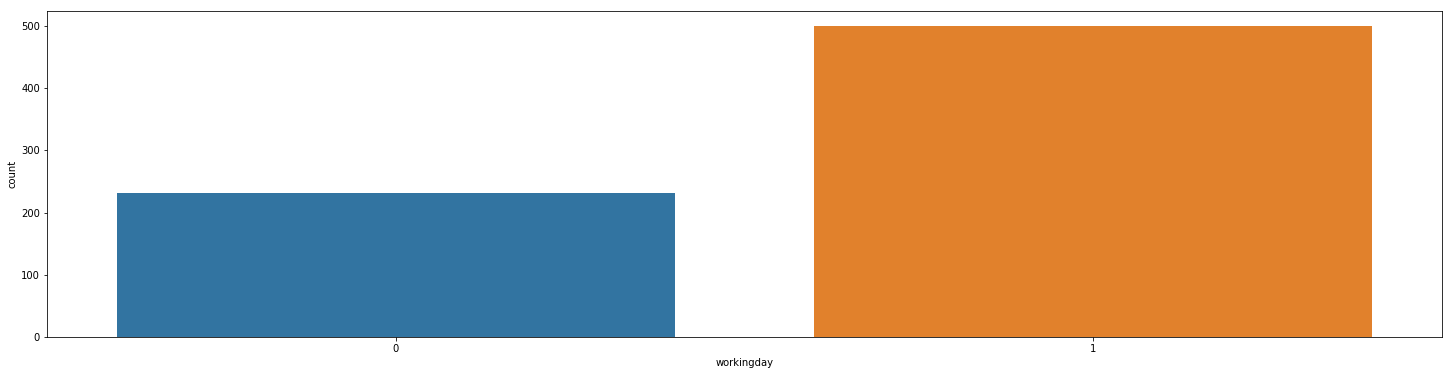

In [14]:
sns.countplot(x='workingday', data= data) #working days have more count

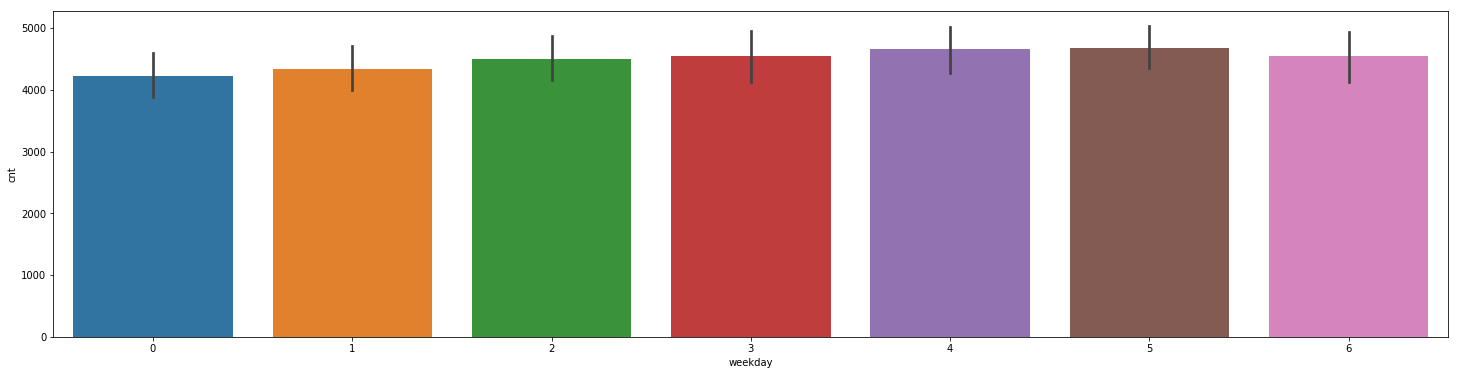

In [15]:
sns.barplot(x='weekday', y='cnt', data= data) #weekdays are almost same

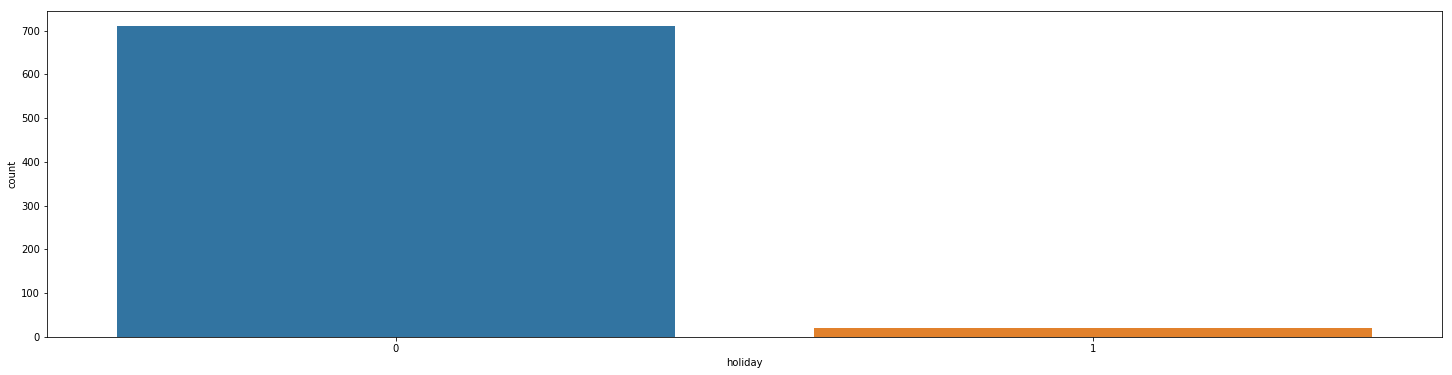

In [16]:
sns.countplot(x='holiday', data= data) #Rentals are  high on  holidays when compare to weekdays

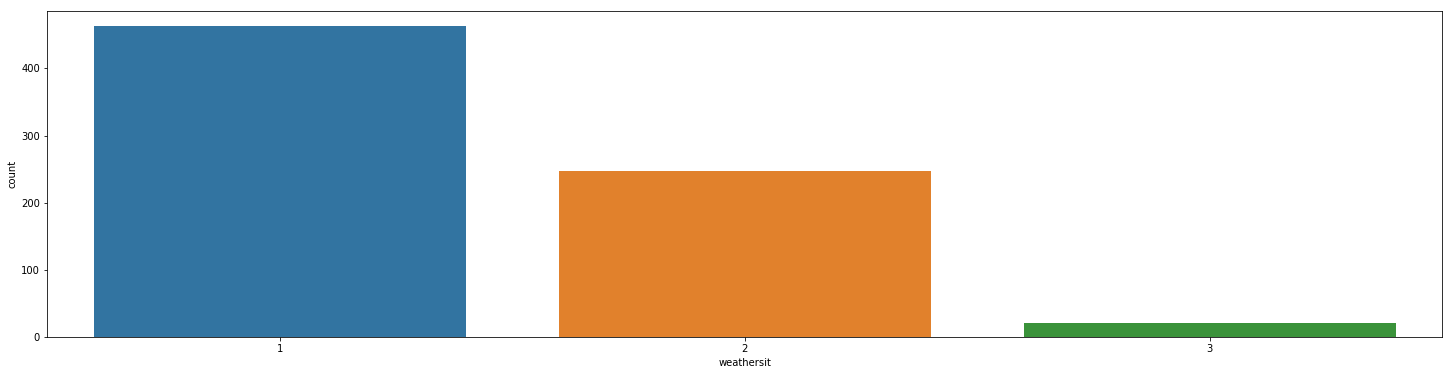

In [17]:
sns.countplot(x='weathersit', data= data) #weathersit 1 have highest count

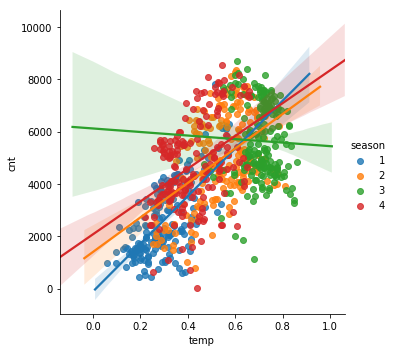

In [18]:
#sns.lmplot(x='temp',y='cnt',data=data) 
sns.lmplot(x='temp',y='cnt',data=data, hue='season') #Increasing temp is increasing rental count

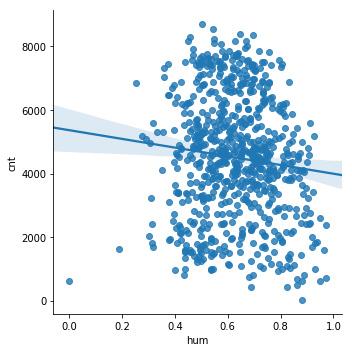

In [19]:
sns.lmplot(x='hum',y='cnt',data=data) 

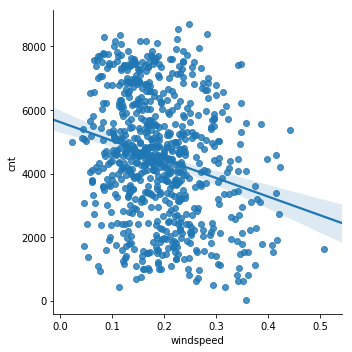

In [20]:
sns.lmplot(x='windspeed',y='cnt',data=data) 

In [21]:
##########################################   missing  values ##############################################
#missingvalue = data.isnull().sum()
#missingvalue

total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
cnt,0,0.0
registered,0,0.0
casual,0,0.0
windspeed,0,0.0
hum,0,0.0
atemp,0,0.0
temp,0,0.0
weathersit,0,0.0
workingday,0,0.0
weekday,0,0.0


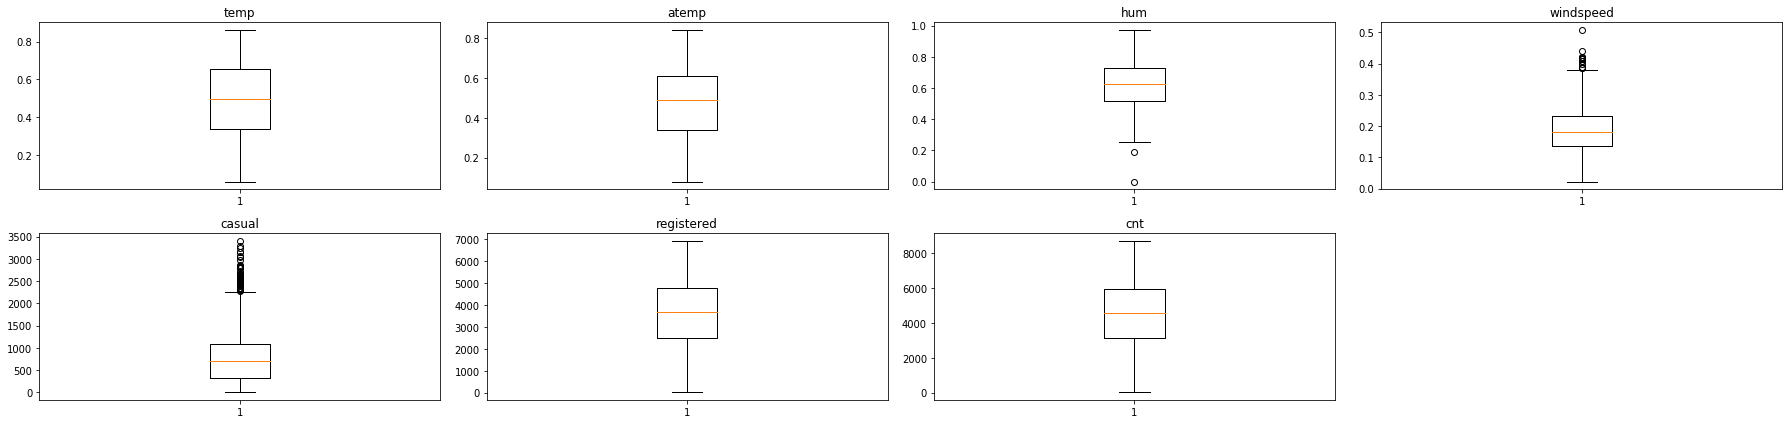

In [22]:
######################################### Outlier Analysis ####################################################

plt.subplot(2,4,1)
plt.boxplot(data['temp'])
plt.title('temp')

plt.subplot(2,4,2)
plt.boxplot(data['atemp'])
plt.title('atemp')

plt.subplot(2,4,3)
plt.boxplot(data['hum'])
plt.title('hum')

plt.subplot(2,4,4)
plt.boxplot(data['windspeed'])
plt.title('windspeed')

plt.subplot(2,4,5)
plt.boxplot(data['casual'])
plt.title('casual')

plt.subplot(2,4,6)
plt.boxplot(data['registered'])
plt.title('registered')

plt.subplot(2,4,7)
plt.boxplot(data['cnt'])
plt.title('cnt')

plt.tight_layout()
#We have outlerss in hum, windspeed and casual

In [23]:
#Deleting Outliers
cname = ['temp','atemp', 'hum','windspeed','casual','registered','cnt']
numeric_data = data[cname]
         
for i in cname:
    print(i)
    q75, q25 = np.percentile(data.loc[:,i],[75,25])
    iqr = q75- q25
    min = q25 - (1.5*iqr)
    max = q75 + (1.5*iqr)
    
    data.loc[data.loc[:,i] < min , i] = np.nan
    data.loc[data.loc[:,i] > max , i] = np.nan   
    
#Deleting purposfully so that while imputing we can chek the results based on these values as we already kbow the values here
#data.iloc[40,11] = np.nan  
#data.iloc[40,12] = np.nan  
#data.iloc[40,13] = np.nan

temp
atemp
hum
windspeed
casual
registered
cnt


In [24]:
pd.isnull(data).sum() #after deletion we have 59 Missing values

instant        0
dteday         0
season         0
yr             0
mnth           0
holiday        0
weekday        0
workingday     0
weathersit     0
temp           0
atemp          0
hum            2
windspeed     13
casual        44
registered     0
cnt            0
dtype: int64

In [25]:
#Imputing Missing value
#1. Imputing hum      

#Actual data.iloc[40,11] = 0.494783
#data['hum'] = data['hum'].fillna(data['hum'].median()) #=0.6283335
#data['hum'] = pd.DataFrame(KNN(k=3).fit_transform(data[['hum']])) #= 0.0
data['hum'] = data['hum'].fillna(data['hum'].mean()) # = 0.41

#print(data.iloc[40,11]) 
# so we are imuting this value with medin since that is the closest value


In [26]:
#2. Imputing windspeed      

#Actual data.iloc[40,12] = 0.08645
data['windspeed'] = data['windspeed'].fillna(data['windspeed'].median()) #=0.179108 
#data['windspeed'] = pd.DataFrame(KNN(k=3).fit_transform(data[['windspeed']])) #= 0.0
#data['windspeed'] = data['windspeed'].fillna(data['windspeed'].mean()) # = 0.18641671227336115

#print(data.iloc[40,12]) 
# so we are imuting this value with medin since that is the closest value


In [27]:
#3. imputing missing casual
#original = 43
#data['casual'] = data['casual'].fillna(data['casual'].median()) # 675
#data['casual'] = data['casual'].fillna(data['casual'].mean()) #732
#data['casual'] = pd.DataFrame(KNN(k=3).fit_transform(data[['casual']])) #= 0.0
data['casual'] = data['casual'].fillna(data['cnt']-data['registered']) # we saw the values are closer this way that is 245
#print(data.iloc[40,13]) 

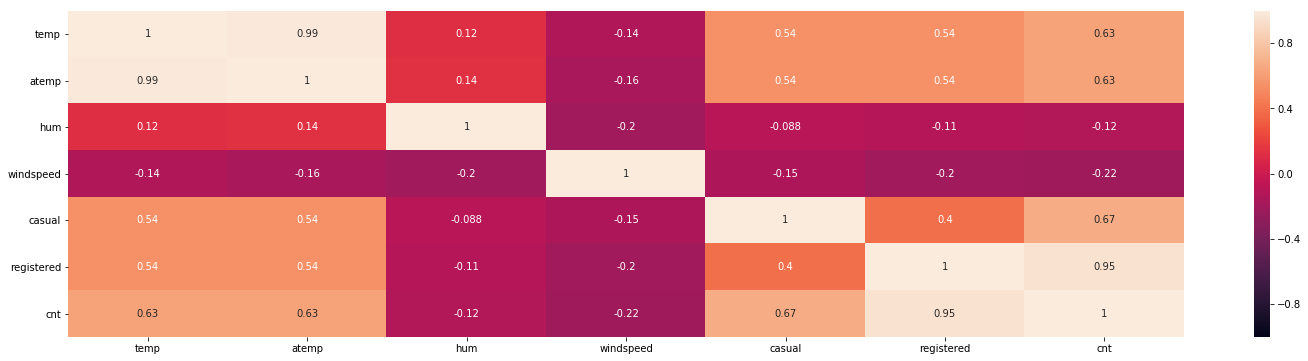

In [28]:
############################################# feature  selection   #######################################
#drawing correlation matrix between all  numeric variables and analyse  what are the variables are important

colname = ['temp','atemp', 'hum','windspeed','casual','registered','cnt']
heat_map = data[colname]
sns.heatmap(heat_map.corr(), vmin=-1.00, vmax=1.00, annot=True)
# we have made heat map to understand the corelation of continious variable

In [29]:
#Dropping variables
#data1 = data.copy()
data = data.drop(['instant','atemp','casual','registered','dteday'], axis=1) 
#instant is unique for all observations hence has no significance
#atemp is strongly correlated with temp
#cnt = casual + registered

In [30]:
data.head() # After Drop out dataset contains

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985.0
1,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801.0
2,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349.0
3,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562.0
4,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600.0


[0.07121245 0.29207494 0.03135656 0.00316612 0.01651274 0.00449558
 0.01797279 0.45814301 0.06984749 0.03521832]


Text(0, 0.5, 'Importance')

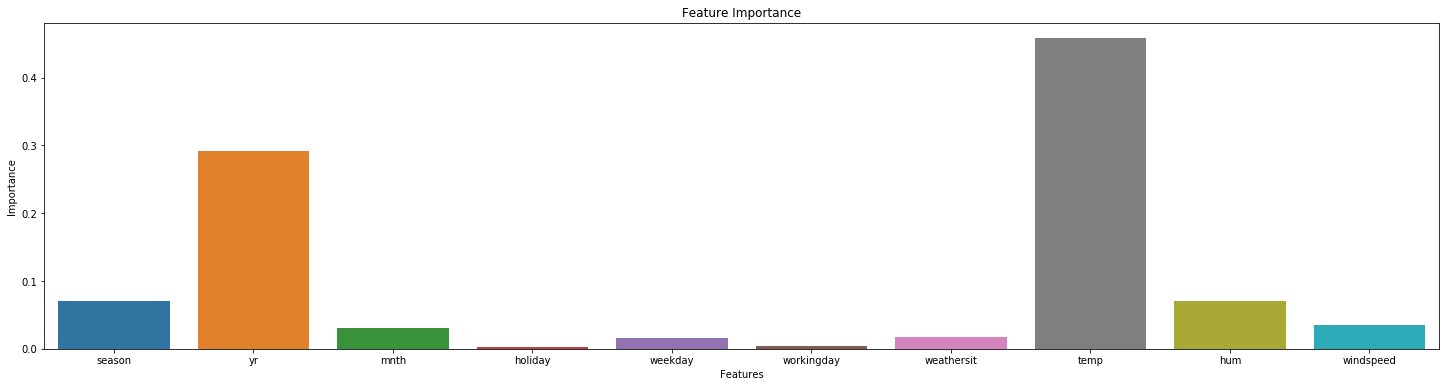

In [31]:
#feature importance from random forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 24).fit(data.iloc[:,0:10],data.iloc[:,10])
print(rf.feature_importances_)

#Feature importance plotting
names=list(data)
names = names[0:10]

sns.barplot(x=names ,y=rf.feature_importances_)  #removing holiday, working day since feature is extremly low

plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')

In [32]:
#anova test
#since the target variable is continuous

import statsmodels.api as sm
from statsmodels.formula.api import ols
#from scipy import stats

In [33]:
#loop for ANOVA test Since the target variable is continuous
#categorical_vars = ['season','yr', 'mnth','holiday','weekday','workingday','weathersit']

#for i in categorical_vars:
    #f, p = stats.f_oneway(data[i], data["cnt"])
    #print("P value for variable "+str(i)+" is "+str(p))

In [34]:
mod1 = ols('cnt ~ season', data = data).fit()
aov_table1 = sm.stats.anova_lm(mod1, type=2)
print(aov_table1) #keep

             df        sum_sq       mean_sq           F        PR(>F)
season      3.0  9.505959e+08  3.168653e+08  128.769622  6.720391e-67
Residual  727.0  1.788940e+09  2.460715e+06         NaN           NaN


In [35]:
mod2 = ols('cnt ~ yr', data = data).fit()
aov_table2 = sm.stats.anova_lm(mod2, type=2)
print(aov_table2) #keep

             df        sum_sq       mean_sq           F        PR(>F)
yr          1.0  8.798289e+08  8.798289e+08  344.890586  2.483540e-63
Residual  729.0  1.859706e+09  2.551038e+06         NaN           NaN


In [36]:
mod3 = ols('cnt ~ mnth', data = data).fit()
aov_table3 = sm.stats.anova_lm(mod3, type=2)
print(aov_table3) #keep

             df        sum_sq       mean_sq          F        PR(>F)
mnth       11.0  1.070192e+09  9.729021e+07  41.903703  4.251077e-70
Residual  719.0  1.669343e+09  2.321757e+06        NaN           NaN


In [37]:
mod4 = ols('cnt ~ holiday', data = data).fit()
aov_table4 = sm.stats.anova_lm(mod4, type=2)
print(aov_table4) #remove

             df        sum_sq       mean_sq         F    PR(>F)
holiday     1.0  1.279749e+07  1.279749e+07  3.421441  0.064759
Residual  729.0  2.726738e+09  3.740381e+06       NaN       NaN


In [38]:
mod5 = ols('cnt ~ weekday', data = data).fit()
aov_table5 = sm.stats.anova_lm(mod5, type=2)
print(aov_table5) #remove

             df        sum_sq       mean_sq         F    PR(>F)
weekday     6.0  1.765902e+07  2.943170e+06  0.782862  0.583494
Residual  724.0  2.721876e+09  3.759498e+06       NaN       NaN


In [39]:
mod6 = ols('cnt ~ workingday', data = data).fit()
aov_table6 = sm.stats.anova_lm(mod6, type=2)
print(aov_table6) #remove

               df        sum_sq       mean_sq         F    PR(>F)
workingday    1.0  1.024604e+07  1.024604e+07  2.736742  0.098495
Residual    729.0  2.729289e+09  3.743881e+06       NaN       NaN


In [40]:
mod7 = ols('cnt ~ weathersit', data = data).fit()
aov_table7 = sm.stats.anova_lm(mod7, type=1)
print(aov_table7) #keep

               df        sum_sq       mean_sq          F        PR(>F)
weathersit    2.0  2.716446e+08  1.358223e+08  40.066045  3.106317e-17
Residual    728.0  2.467891e+09  3.389960e+06        NaN           NaN


In [41]:
#from anova and feature importance plotting of random forest, we decided to drop holiday and workingday
data = data.drop(['holiday', 'workingday'], axis=1)

In [42]:
data.head()
#dataScale = data.copy()
#dataScale.head()

,season,yr,mnth,weekday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,6,2,0.344167,0.805833,0.160446,985.0
1,1,0,1,0,2,0.363478,0.696087,0.248539,801.0
2,1,0,1,1,1,0.196364,0.437273,0.248309,1349.0
3,1,0,1,2,1,0.200000,0.590435,0.160296,1562.0
4,1,0,1,3,1,0.226957,0.436957,0.186900,1600.0


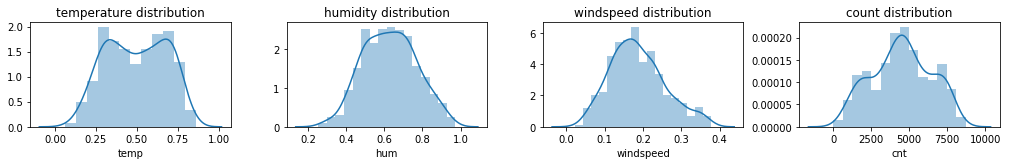

In [43]:
#######################################  feature  Scaling ######################################
#Scaling for Continious variable 
plt.figure(figsize=(14,4))

plt.subplot(2,4,1)
sns.distplot(data['temp'])
plt.title('temperature distribution')

plt.subplot(2,4,2)
sns.distplot(data['hum'])
plt.title('humidity distribution')

plt.subplot(2,4,3)
sns.distplot(data['windspeed'])
plt.title('windspeed distribution')

plt.subplot(2,4,4)
sns.distplot(data['cnt'])
plt.title('count distribution')

plt.tight_layout()

#All our continuous variables are already normalized except the target variable which we prefer not to scale because its variation are spread quite widely and after scaling, the difference between the number is diminishing. 

In [44]:
#********************************** Modeling ************************************
##Sampling: dividing  Test and train data  using sklearn 
from sklearn.model_selection import train_test_split,KFold, cross_val_score, cross_val_predict

#Random sample selection 
train, test = train_test_split(data, test_size = 0.20, random_state = 100)
train.to_csv("TrainFile_BikeRenting.csv", index=False)
test.to_csv("TestFile_BikeRenting.csv", index=False)
data.shape, test.shape , train.shape



((731, 9), (147, 9), (584, 9))

In [45]:
from sklearn import metrics
#function to check performance  
def performance(actual, predict):
    print('MSE:', metrics.mean_squared_error(actual, predict)) 
    print('RMSE:', np.sqrt(metrics.mean_squared_error(actual, predict))) 
    print('MAPE:',np.mean(np.abs((actual-predict)/actual))*100)
    print('R-Sq:', metrics.r2_score(actual, predict))

In [46]:
#1. ############################################ Decision Tree ############################
from sklearn.tree import DecisionTreeRegressor

#1. K-fold for cross validation of our model
#k_fold = KFold(n_splits = 10, shuffle=True, random_state=101).get_n_splits(train.iloc[:,0:8])
#rmse = np.sqrt(cross_val_score(dt1, train.iloc[:,0:8], train.iloc[:,8], cv= k_fold))

dt1 = DecisionTreeRegressor(max_depth =6, random_state=123).fit(train.iloc[:,0:8],train.iloc[:,8])
prediction_dt1 = dt1.predict(test.iloc[:,0:8])

#error matrix
performance(test.iloc[:,8],prediction_dt1)
print('                           ')
print('Perdicted Vs Actual value: ')
prediction_dt1[6], test.iloc[6,8]

MSE: 576621.9816371171
RMSE: 759.3562942631852
MAPE: 16.68260112239678
R-Sq: 0.8308817145626113
                           
Perdicted Vs Actual value: 


(4836.171052631579, 4458.0)

In [47]:
#2. ############################################ Random Forest ########################################################
from sklearn.ensemble import RandomForestRegressor

rf1 = RandomForestRegressor(n_estimators = 100, random_state = 126).fit(train.iloc[:,0:8],train.iloc[:,8])
prediction_rf1 = rf1.predict(test.iloc[:,0:8])

performance(test.iloc[:,8],prediction_rf1)
print('                           ')
print('Perdicted Vs Actual value: ')
prediction_rf1[1], test.iloc[1,8]

MSE: 373287.8126204082
RMSE: 610.9728411479582
MAPE: 13.49154152137534
R-Sq: 0.8905178837168128
                           
Perdicted Vs Actual value: 


(6966.87, 6825.0)

In [48]:
#3. ############################################ Linear Regression ############################
from sklearn.linear_model import LinearRegression

ln_model = LinearRegression().fit(train.iloc[:,0:8],train.iloc[:,8])

prediction_lr1 = ln_model.predict(test.iloc[:,0:8])

performance(test.iloc[:,8],prediction_lr1)
print('                           ')
print('Perdicted Vs Actual value: ')
prediction_lr1[1], test.iloc[1,8]


MSE: 797456.5748945858
RMSE: 893.0042412522943
MAPE: 19.559614737326346
R-Sq: 0.7661128209610667
                           
Perdicted Vs Actual value: 


(6530.611992260371, 6825.0)

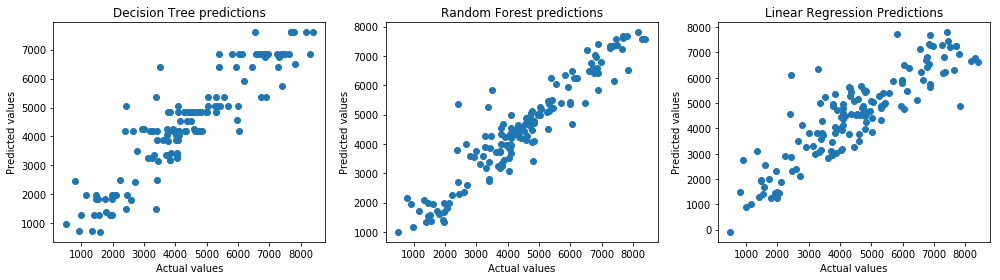

In [49]:
#Ploting to understand the spread of predicted data. 

plt.figure(figsize=(14,4))

plt.subplot(1,3,1)
plt.title('Decision Tree predictions')
plt.scatter(test.iloc[:,8] , prediction_dt1)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.subplot(1,3,2)
plt.title('Random Forest predictions')
plt.scatter(test.iloc[:,8] , prediction_rf1)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.subplot(1,3,3)
plt.title('Linear Regression Predictions')
plt.scatter(test.iloc[:,8] , prediction_lr1)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.tight_layout()

In [50]:
#Hence we are finalising random forest
#saving results
test['DT Predictions'] = prediction_dt1
test['RF Predictions'] = prediction_rf1
test['LR Prediction'] = prediction_lr1

train.to_csv("TrainFile1onwhichModelistrained.csv", index=False)
test.to_csv("TestFile1withresultsfromModel.csv", index=False)

C:\Users\tanis\AnacondaNew\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\tanis\AnacondaNew\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\tanis\AnacondaNew\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind